In [70]:
# Following 
# https://towardsdatascience.com/knn-algorithm-what-when-why-how-41405c16c36f#:~:text=KNN%20is%20one%20of%20the,how%20its%20neighbor%20is%20classified.&text=KNN%20classifies%20the%20new%20data,dataset%20of%20tomatoes%20and%20bananas.
    

In [71]:
# lets import our Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split ## for train and test
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [72]:
data = pd.read_csv('Datasets/diabetes.csv')

In [73]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Preporcessing Data  
**Age**

In [74]:
max_age = data['Age'].max()
min_age = data["Age"].min()
mean_age = data["Age"].mean()
print("Max Age :",max_age)
print("Min Age : ",min_age)
print("Mean Age : ",mean_age)

Max Age : 81
Min Age :  21
Mean Age :  33.240885416666664


**BMI**

In [75]:
max_BMI = data['BMI'].max()
min_BMI = data["BMI"].min()
mean_BMI = data["BMI"].mean()
print("Max BMI :",max_age)
print("Min BMI : ",min_age)
print("Mean BMI : ",mean_age)

Max BMI : 81
Min BMI :  21
Mean BMI :  33.240885416666664


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [77]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Lets Get Started toward Model

In [101]:
non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for coloumn in non_zero:
    data[coloumn] = data[coloumn].replace(0,np.NaN)
    mean = int(data[coloumn].mean(skipna = True))
    data[coloumn] = data[coloumn].replace(np.NaN, mean)
    print(data[coloumn])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


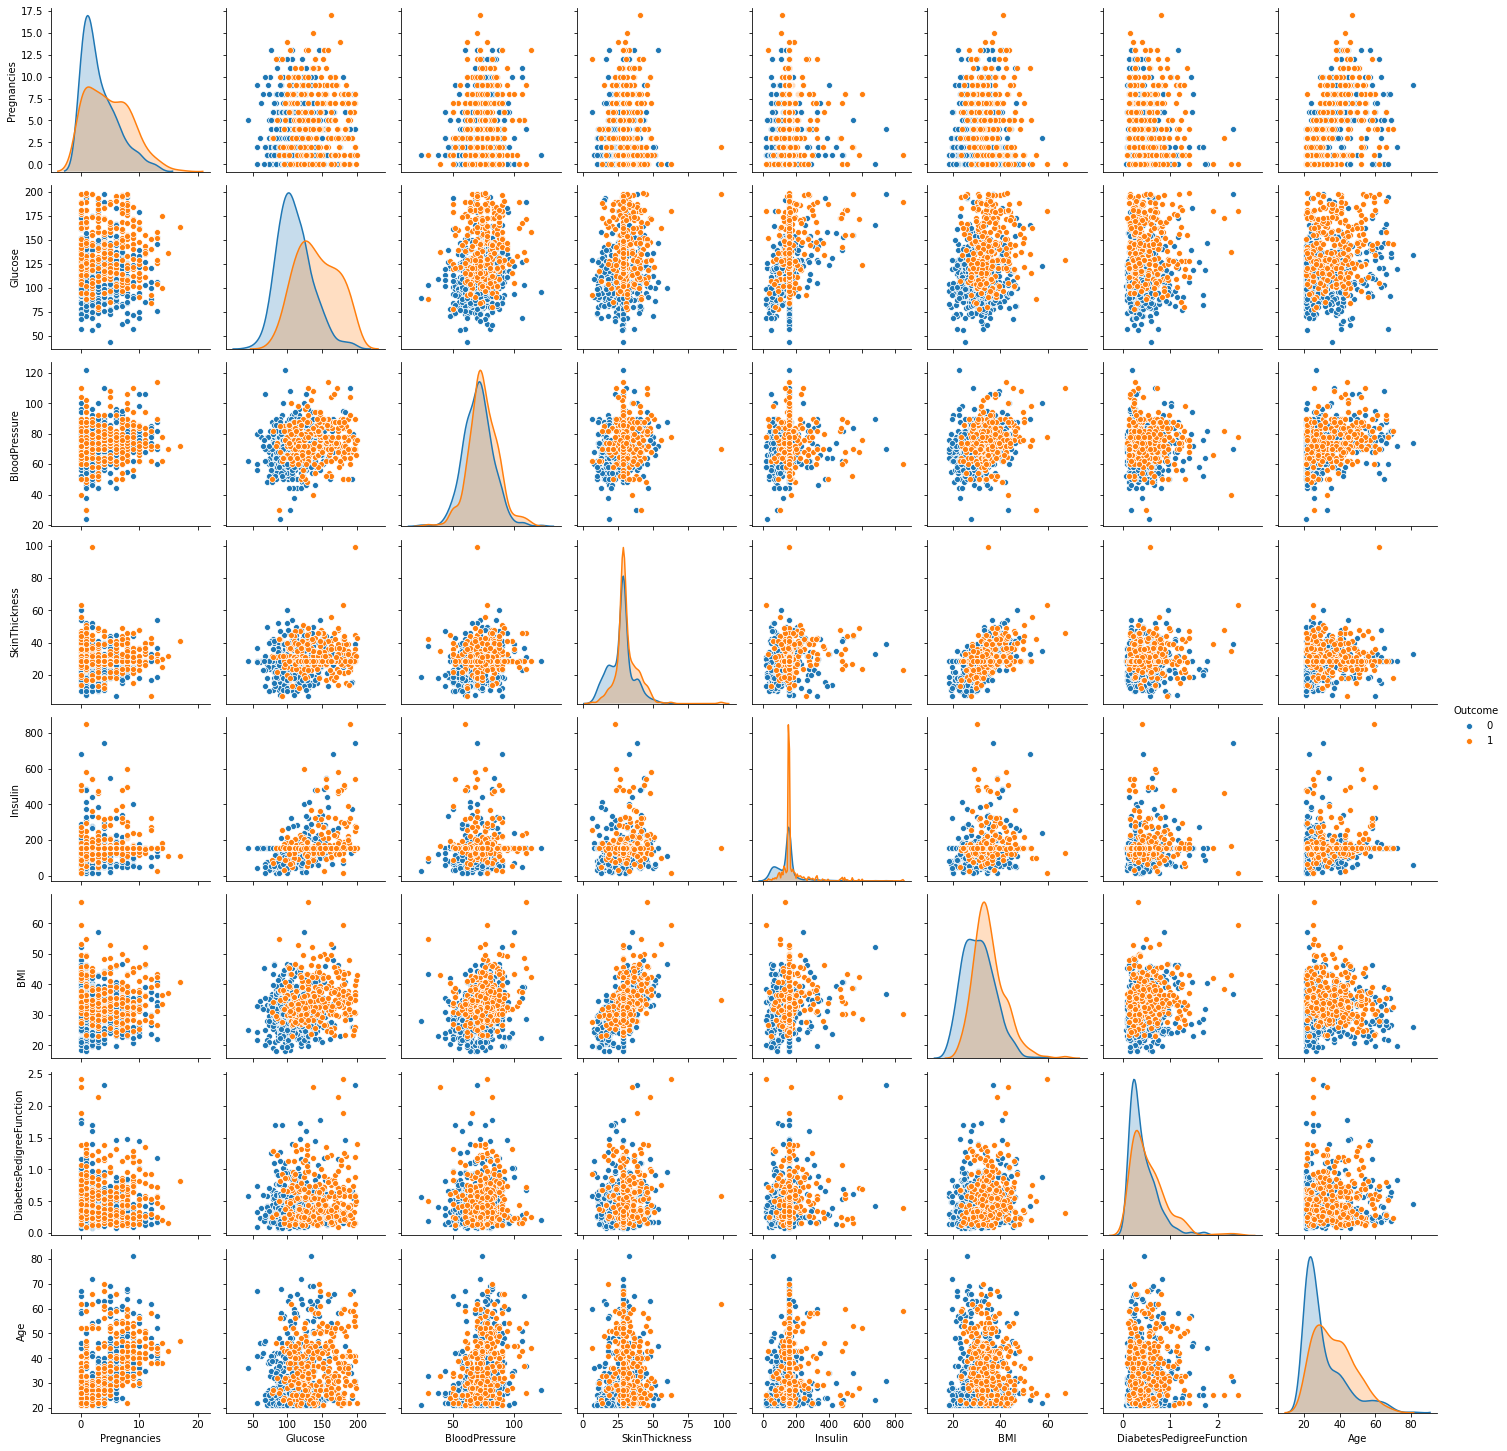

In [102]:
import seaborn as sns
p=sns.pairplot(data, hue = 'Outcome')

## Train and Test Data

In [104]:
X =data.iloc[:,0:8]
y =data.iloc[:,8]
X_train,X_test,y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)

In [105]:
y = data.iloc[:,8]  ## just y as output which is use for prediction last colums
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

## Features Scaling
StandardScaler performs the task of Standardization. Usually a dataset   contains variables that are different in scale. For example, the dataset   will contain an insulin column with values on scale 20–70 and Glucose   column with values on scale 80–200. As these two columns are different   in scale, they are standardized to have a common scale while building   a machine learning model.

In [106]:
#feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [87]:
import math
math.sqrt(len(y_test))

12.409673645990857

In [107]:
classifier = KNeighborsClassifier(n_neighbors=13,p=2,metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [109]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [110]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[86, 14],
       [24, 30]])

In [111]:
print(f1_score(y_test,y_pred))

0.6122448979591836


In [112]:
print(accuracy_score(y_test,y_pred))

0.7532467532467533


## Plot the predtion and actual Values

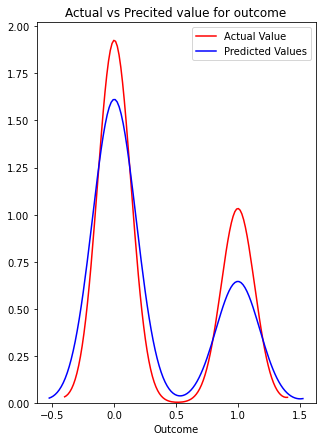

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))
ax = sns.distplot(data['Outcome'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax)
plt.title('Actual vs Precited value for outcome')
plt.show()
plt.close()